In [1]:
import matplotlib.pyplot as plt
import numpy as np

from environments.Simulator.CleanPlantSimulator import CleanPlantSimulator

In [2]:
env = CleanPlantSimulator()

#### Test different lighting policies

/tmp/ipykernel_27142/1670044613.py:16: RuntimeWarning: coroutine 'CleanPlantSimulator.start' was never awaited
  env.start()
/tmp/ipykernel_27142/1670044613.py:18: RuntimeWarning: coroutine 'CleanPlantSimulator.step' was never awaited
  reward, next_state, done, info = env.step(pol[_])


TypeError: cannot unpack non-iterable coroutine object

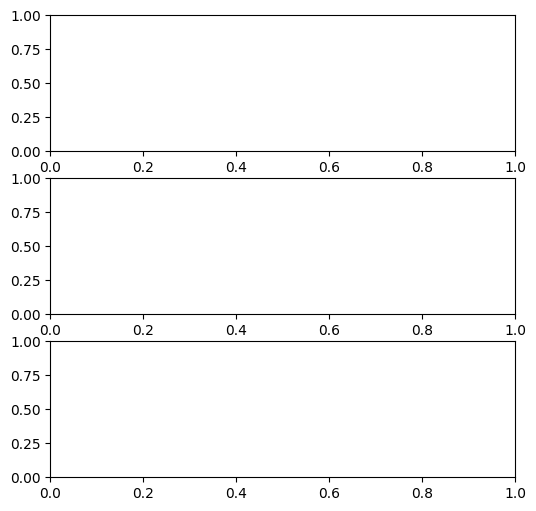

In [3]:
COLORS = ["r", "b", "g"]
LABELS = ["always dim", "random", "always standard"]
fig, ax = plt.subplots(3, 1, figsize=(6, 6))

policy1 = np.tile(
    np.hstack([np.zeros(12 * 9), np.ones(12 * 12) * 50, np.zeros(12 * 3)]), 14
)
policy2 = np.tile(
    np.hstack(
        [
            np.zeros(12 * 9),
            np.random.choice([80, 90, 100, 110, 120, 130], 12 * 12),
            np.zeros(12 * 3),
        ]
    ),
    14,
)
policy3 = np.tile(
    np.hstack([np.zeros(12 * 9), np.ones(12 * 12) * 100, np.zeros(12 * 3)]), 14
)

policy = [policy1, policy2, policy3]

for i in range(3):
    R = []
    State = []
    pol = policy[i]

    env.start()
    for _ in range(env.total_steps):
        reward, next_state, done, info = env.step(pol[_])
        R.append(reward)
        State.append(next_state)
    R = np.array(R)
    ax[i].plot(R, linewidth=1, color=COLORS[i])
    ax[i].set_title(f"{LABELS[i]}, total reward={np.sum(R):.4f}")
    ax[i].set_xlabel("Step")
    ax[i].set_ylabel("Reward")
    # ax[i].set_ylim(0,2.2)

# for i in range(int(len(R) / env.steps_per_day) + 1):
#    ax[0].axvline(x=env.steps_per_day * i, color="k", linestyle="--", linewidth=0.5)
#    ax[1].axvline(x=env.steps_per_day * i, color="k", linestyle="--", linewidth=0.5)
#    ax[2].axvline(x=env.steps_per_day * i, color="k", linestyle="--", linewidth=0.5)

fig.tight_layout()

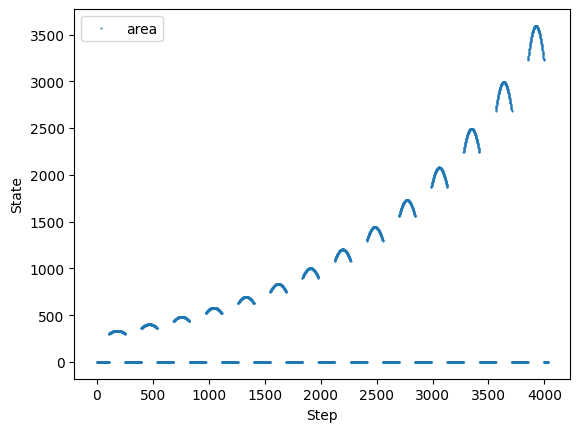

In [ ]:
fig, ax = plt.subplots(1, 1)
State = np.array(State)
ax.plot(State[:, 1], ".", markersize=1, label="area")

ax.set_ylabel("State")
ax.set_xlabel("Step")
ax.legend()